In [1]:
import os
import torch
import torch.nn as nn
import torchaudio

In [2]:
def get_transcriptions(path):
    with open(path) as f:
        lines = f.read().split('\n')
        return lines

In [3]:
path = './data/segments/'

In [4]:
lines = get_transcriptions(path+'train.txt')
if (lines[-1]==''):
    lines = lines[:-1]
len(lines)

3550

In [5]:
def parser_line(line):
    id, text, phoneme, note, note_duration, phoneme_duration, slur_note = line.split('|')
    phoneme = phoneme.split(' ')
    note = note.split(' ')
    note_duration = [float(i) for i in note_duration.split(' ')]
    phoneme_duration = [float(i) for i in phoneme_duration.split(' ')]
    slur_note = [int(i) for i in slur_note.split(' ')]
    assert len(phoneme) == len(note_duration) and len(phoneme_duration) == len(slur_note) and len(slur_note) == len(phoneme)
    return id, text, phoneme, note, note_duration, phoneme_duration, slur_note


In [6]:
phoneme_set = set()
note_set = set()
for line in lines:
    id, text, phoneme, note, note_duration, phoneme_duration, slur_note = parser_line(line)
    phoneme_set.update(set(phoneme))
    note_set.update(set(note))

In [7]:
# phoneme_set, note_set

In [8]:
line = lines[4]
line

'2001000005|面对浩瀚的星海我们微小得像尘埃|m ian d ui h ao h an an d e x ing h ai ai ai AP w o m en w ei x iao d e x iang ch en ai ai ai SP|C#4/Db4 C#4/Db4 D#4/Eb4 D#4/Eb4 C#4/Db4 C#4/Db4 D#4/Eb4 D#4/Eb4 E4 D#4/Eb4 D#4/Eb4 E4 E4 G#4/Ab4 G#4/Ab4 A4 G#4/Ab4 rest C#4/Db4 C#4/Db4 C#4/Db4 C#4/Db4 D#4/Eb4 D#4/Eb4 C#4/Db4 C#4/Db4 D#4/Eb4 D#4/Eb4 E4 E4 E4 E4 G#4/Ab4 A4 G#4/Ab4 rest|0.196990 0.196990 0.102120 0.102120 0.304680 0.304680 0.096780 0.096780 0.100220 0.150010 0.150010 0.361460 0.361460 0.221070 0.221070 0.183240 0.478670 0.384620 0.106510 0.106510 0.143020 0.143020 0.169480 0.169480 0.224180 0.224180 0.089360 0.089360 0.414460 0.414460 0.378050 0.378050 0.162790 0.207380 0.317260 0.297040|0.02765 0.16934 0.01874 0.08338 0.0821 0.22258 0.0693 0.02748 0.10022 0.07137 0.07864 0.12471 0.23675 0.12356 0.09751 0.18324 0.47867 0.38462 0.0405 0.06601 0.08303 0.05999 0.04687 0.12261 0.09778 0.1264 0.02321 0.06615 0.11958 0.29488 0.06723 0.31082 0.16279 0.20738 0.31726 0.29704|0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 

In [9]:
id, text, phoneme, note, note_duration, phoneme_duration, slur_note = parser_line(line)

In [10]:
def get_audio(id, path, sr = 16000):
    wav_path = path+'wavs/'+id+'.wav'
    waveform, sample_rate = torchaudio.load(wav_path)
    if sample_rate != sr:
        waveform = torchaudio.functional.resample(waveform[0].unsqueeze(0), sample_rate, sr)
    return waveform

waveform = get_audio(id, path)

In [11]:
sum(phoneme_duration)//1, waveform.shape[-1]/16000

(5.0, 5.0894375)

In [12]:
from utils.visual import plot_alignment

In [13]:
waveform = get_audio(id, path)
waveform

tensor([[ 0.0016,  0.0027,  0.0027,  ..., -0.0004, -0.0002, -0.0001]])

In [14]:
def plot_info(i):
    id, text, phoneme, note, note_duration, phoneme_duration, slur_note = parser_line(lines[i])
    waveform = get_audio(id, path)
    plot_alignment(waveform[0], text, phoneme, note, note_duration, phoneme_duration, slur_note)
    

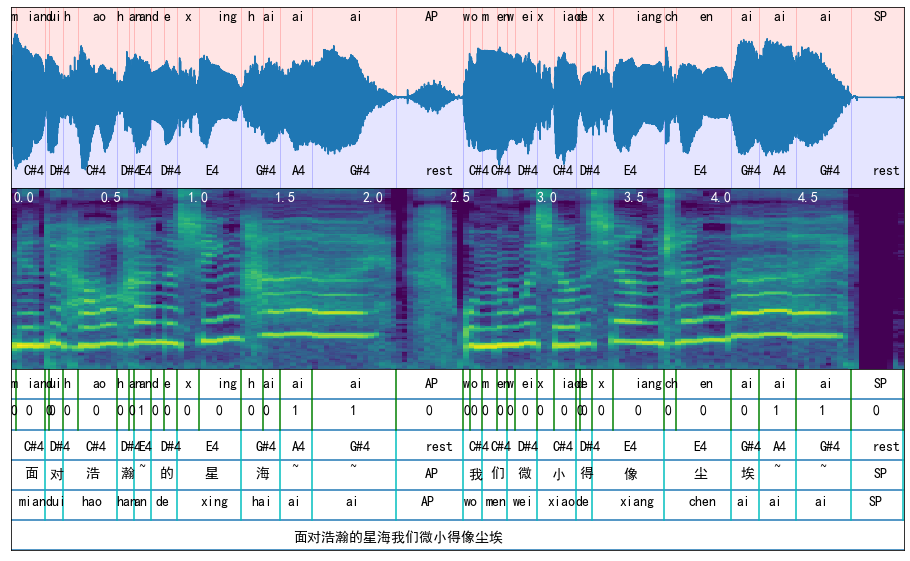

In [15]:
plot_info(4)